In [1]:
import os, pickle

import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt


import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Colors using scheme
c = ["#" + i for i  in "264653-2a9d8f-e9c46a-f4a261-e76f51".split("-")]
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = pd.read_pickle("/mnt/c/Users/johan/Desktop/CMT_project/data/train_test_data.dat")


2022-02-15 13:56:49.945725: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-15 13:56:49.945818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Simple peak height measurement

AUC score: 0.875


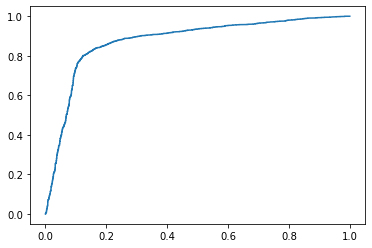

In [4]:
peak_height = X_test[:, 50:150].max(1)

roc         = roc_curve(y_test, peak_height)
auc         = roc_auc_score(y_test, peak_height)

plt.plot(roc[0], roc[1])

print(f"AUC score: {auc:.3f}")

with open("../predictions/peak_height.dat", "wb") as file:
    pickle.dump((peak_height, y_test), file)




## UMAP

AUC score: 0.195


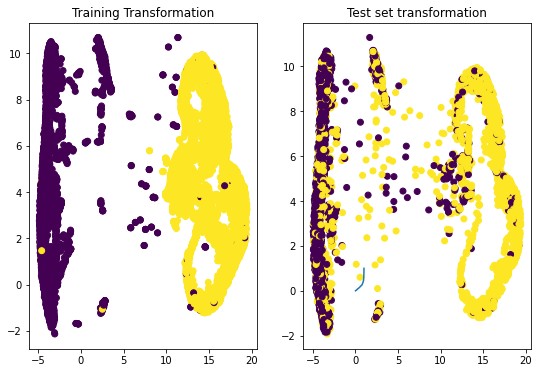

In [5]:
from umap import UMAP
fig, ax = plt.subplots(ncols = 2, figsize = (9, 6))

Reducer = UMAP()
embedded_training = Reducer.fit_transform(X_train, y = y_train)

ax[0].scatter(embedded_training[:, 0], embedded_training[:, 1], c = y_train)
ax[0].set(title = "Training Transformation")

embedded_test = Reducer.transform(X_test)
ax[1].scatter(embedded_test[:, 0], embedded_test[:, 1], c = y_test)
ax[1].set(title = "Test set transformation")

roc         = roc_curve(y_test, - embedded_test[:, 0])
auc         = roc_auc_score(y_test, - embedded_test[:, 0])

plt.plot(roc[0], roc[1])

print(f"AUC score: {auc:.3f}")

with open("../predictions/umap_real_time.dat", "wb") as file:
    pickle.dump((embedded_test[:, 0], y_test), file)


AUC score: 0.220


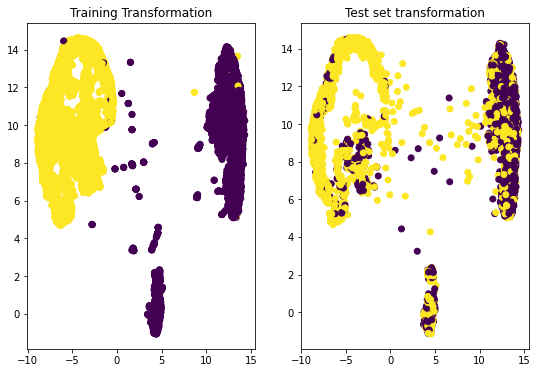

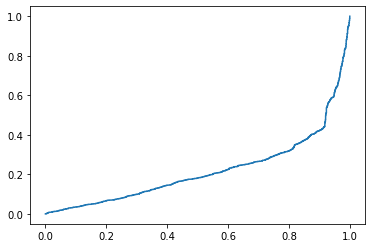

In [6]:
from umap import UMAP
fig, ax = plt.subplots(ncols = 2, figsize = (9, 6))

def fft_abs_phase(input):
    transformed = np.fft.rfft(input)
    output      = np.concatenate([np.abs(transformed), np.cos(np.angle(transformed)), np.sin(np.angle(transformed))],
                                  axis = 1)
    return output


Reducer = UMAP()
embedded_training = Reducer.fit_transform(fft_abs_phase(X_train), y = y_train)

ax[0].scatter(embedded_training[:, 0], embedded_training[:, 1], c = y_train)
ax[0].set(title = "Training Transformation")

embedded_test = Reducer.transform(fft_abs_phase(X_test))
ax[1].scatter(embedded_test[:, 0], embedded_test[:, 1], c = y_test)
ax[1].set(title = "Test set transformation")

plt.figure()
roc         = roc_curve(y_test, embedded_test[:, 0])
auc         = roc_auc_score(y_test, embedded_test[:, 0])

plt.plot(roc[0], roc[1])

print(f"AUC score: {auc:.3f}")

with open("../predictions/umap_fft.dat", "wb") as file:
    pickle.dump((embedded_test[:, 0], y_test), file)
